### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from generalPipeline import *

### Datasets

In [5]:
df_adapt = pd.read_csv('../../../Datasets/RQ2/svelte/svelte_adaptable_issues.csv')
df_consis = pd.read_csv('../../../Datasets/RQ2/svelte/svelte_consistent_issues.csv')
df_intention = pd.read_csv('../../../Datasets/RQ2/svelte/svelte_intentional_issues.csv')

In [6]:
df = process_dataframes('svelte', df_adapt, df_consis, df_intention)
df.head()

d:\Semester\7th Semester\SWE 4701 (Software Metric)\Term Paper\Code\venv\Analysis-of-Code-Smell-and-Refactoring\Code\Analysis\RQ2\generalPipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name].iloc[0] = df[column_name + '_total_debt_of_' + JSlibraryName].iloc[0]
d:\Semester\7th Semester\SWE 4701 (Software Metric)\Term Paper\Code\venv\Analysis-of-Code-Smell-and-Refactoring\Code\Analysis\RQ2\generalPipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name].iloc[0] = df[column_name + '_total_debt_of_' + JSlibraryName].iloc[0]
d:\Semester\7th Semester\SWE 4701 (Software Metr

,version_of_svelte,date_of_svelte,timestamp_of_svelte,adaptability_total_debt_low_of_svelte,adaptability_total_debt_medium_of_svelte,adaptability_total_debt_high_of_svelte,adaptability_total_debt_of_svelte,adaptability_total_debt_difference_with_previous_version_of_svelte,consistency_total_debt_low_of_svelte,consistency_total_debt_medium_of_svelte,consistency_total_debt_high_of_svelte,consistency_total_debt_of_svelte,consistency_total_debt_difference_with_previous_version_of_svelte,intentionality_total_debt_low_of_svelte,intentionality_total_debt_medium_of_svelte,intentionality_total_debt_high_of_svelte,intentionality_total_debt_of_svelte,intentionality_total_debt_difference_with_previous_version_of_svelte
0,v0.0.2,2016-11-20,1479665674,0,225,26831,27056,27056.0,421,40,10,471,471.0,37,323,95,455,455.0
1,v0.1.0,2016-11-20,1479700627,0,225,26954,27179,123.0,421,40,10,471,0.0,37,323,90,450,-5.0
2,v0.1.1,2016-11-22,1479819871,0,225,27007,27232,53.0,421,40,10,471,0.0,37,328,80,445,-5.0
3,v0.2.0,2016-11-25,1480107163,0,225,27041,27266,34.0,421,40,10,471,0.0,47,257,140,444,-1.0
4,v0.2.1,2016-11-25,1480112805,0,210,27143,27353,87.0,426,35,10,471,0.0,47,277,130,454,10.0


### Sum of differences 

In [7]:
def sumOfDiff(df, column_name):
    df_sum_of_diff = df[column_name].iloc[1:].sum()
    return df_sum_of_diff

In [8]:
df_adapt_sum = sumOfDiff(df, 'adaptability_total_debt_difference_with_previous_version_of_svelte')
df_consis_sum = sumOfDiff(df, 'consistency_total_debt_difference_with_previous_version_of_svelte')
df_intention_sum = sumOfDiff(df, 'intentionality_total_debt_difference_with_previous_version_of_svelte')

In [9]:
print(df_adapt_sum)
print(df_consis_sum)
print(df_intention_sum)

-25282.0
237.0
-127.0


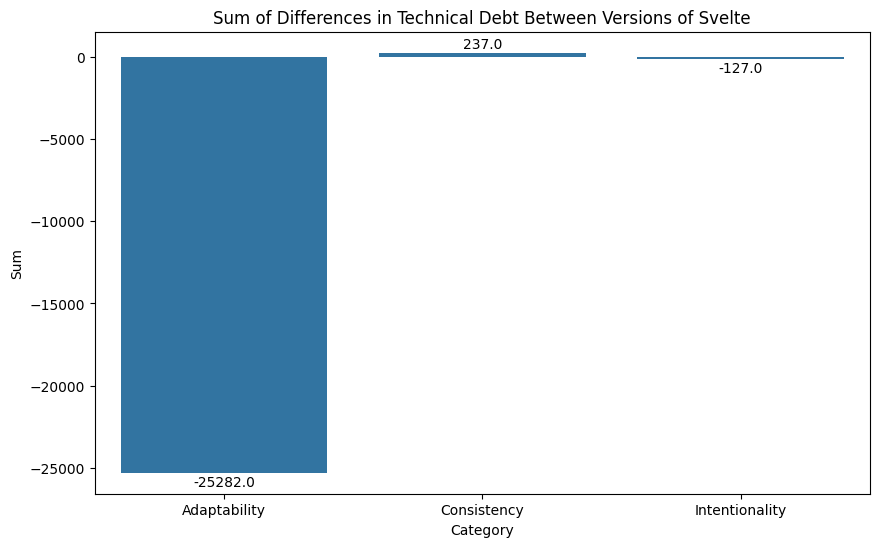

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the sums
df_sums = pd.DataFrame({
    'Category': ['Adaptability', 'Consistency', 'Intentionality'],
    'Sum': [df_adapt_sum, df_consis_sum, df_intention_sum]
})

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Sum', data=df_sums)
plt.title('Sum of Differences in Technical Debt Between Versions of Svelte')

# Add sum values at the top of each bar for positive values and at the bottom for negative values
for i, row in df_sums.iterrows():
    if row.Sum >= 0:
        barplot.text(i, row.Sum + 1 * df_sums['Sum'].max(), round(row.Sum, 2), color='black', ha="center")
    else:
        barplot.text(i, row.Sum - 3.5 * df_sums['Sum'].max(), round(row.Sum, 2), color='black', ha="center")

plt.show()

C:\Users\sadik\AppData\Local\Temp\ipykernel_25676\1340231141.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col_idx].set_xticklabels(axs[row, col_idx].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_25676\1340231141.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col_idx].set_xticklabels(axs[row, col_idx].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_25676\1340231141.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col_idx].set_xticklabels(axs[row, col_idx].get_xticklabels(), rotation=90)
C:\Users\sadik\AppData\Local\Temp\ipykernel_25676\1340231141.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. a

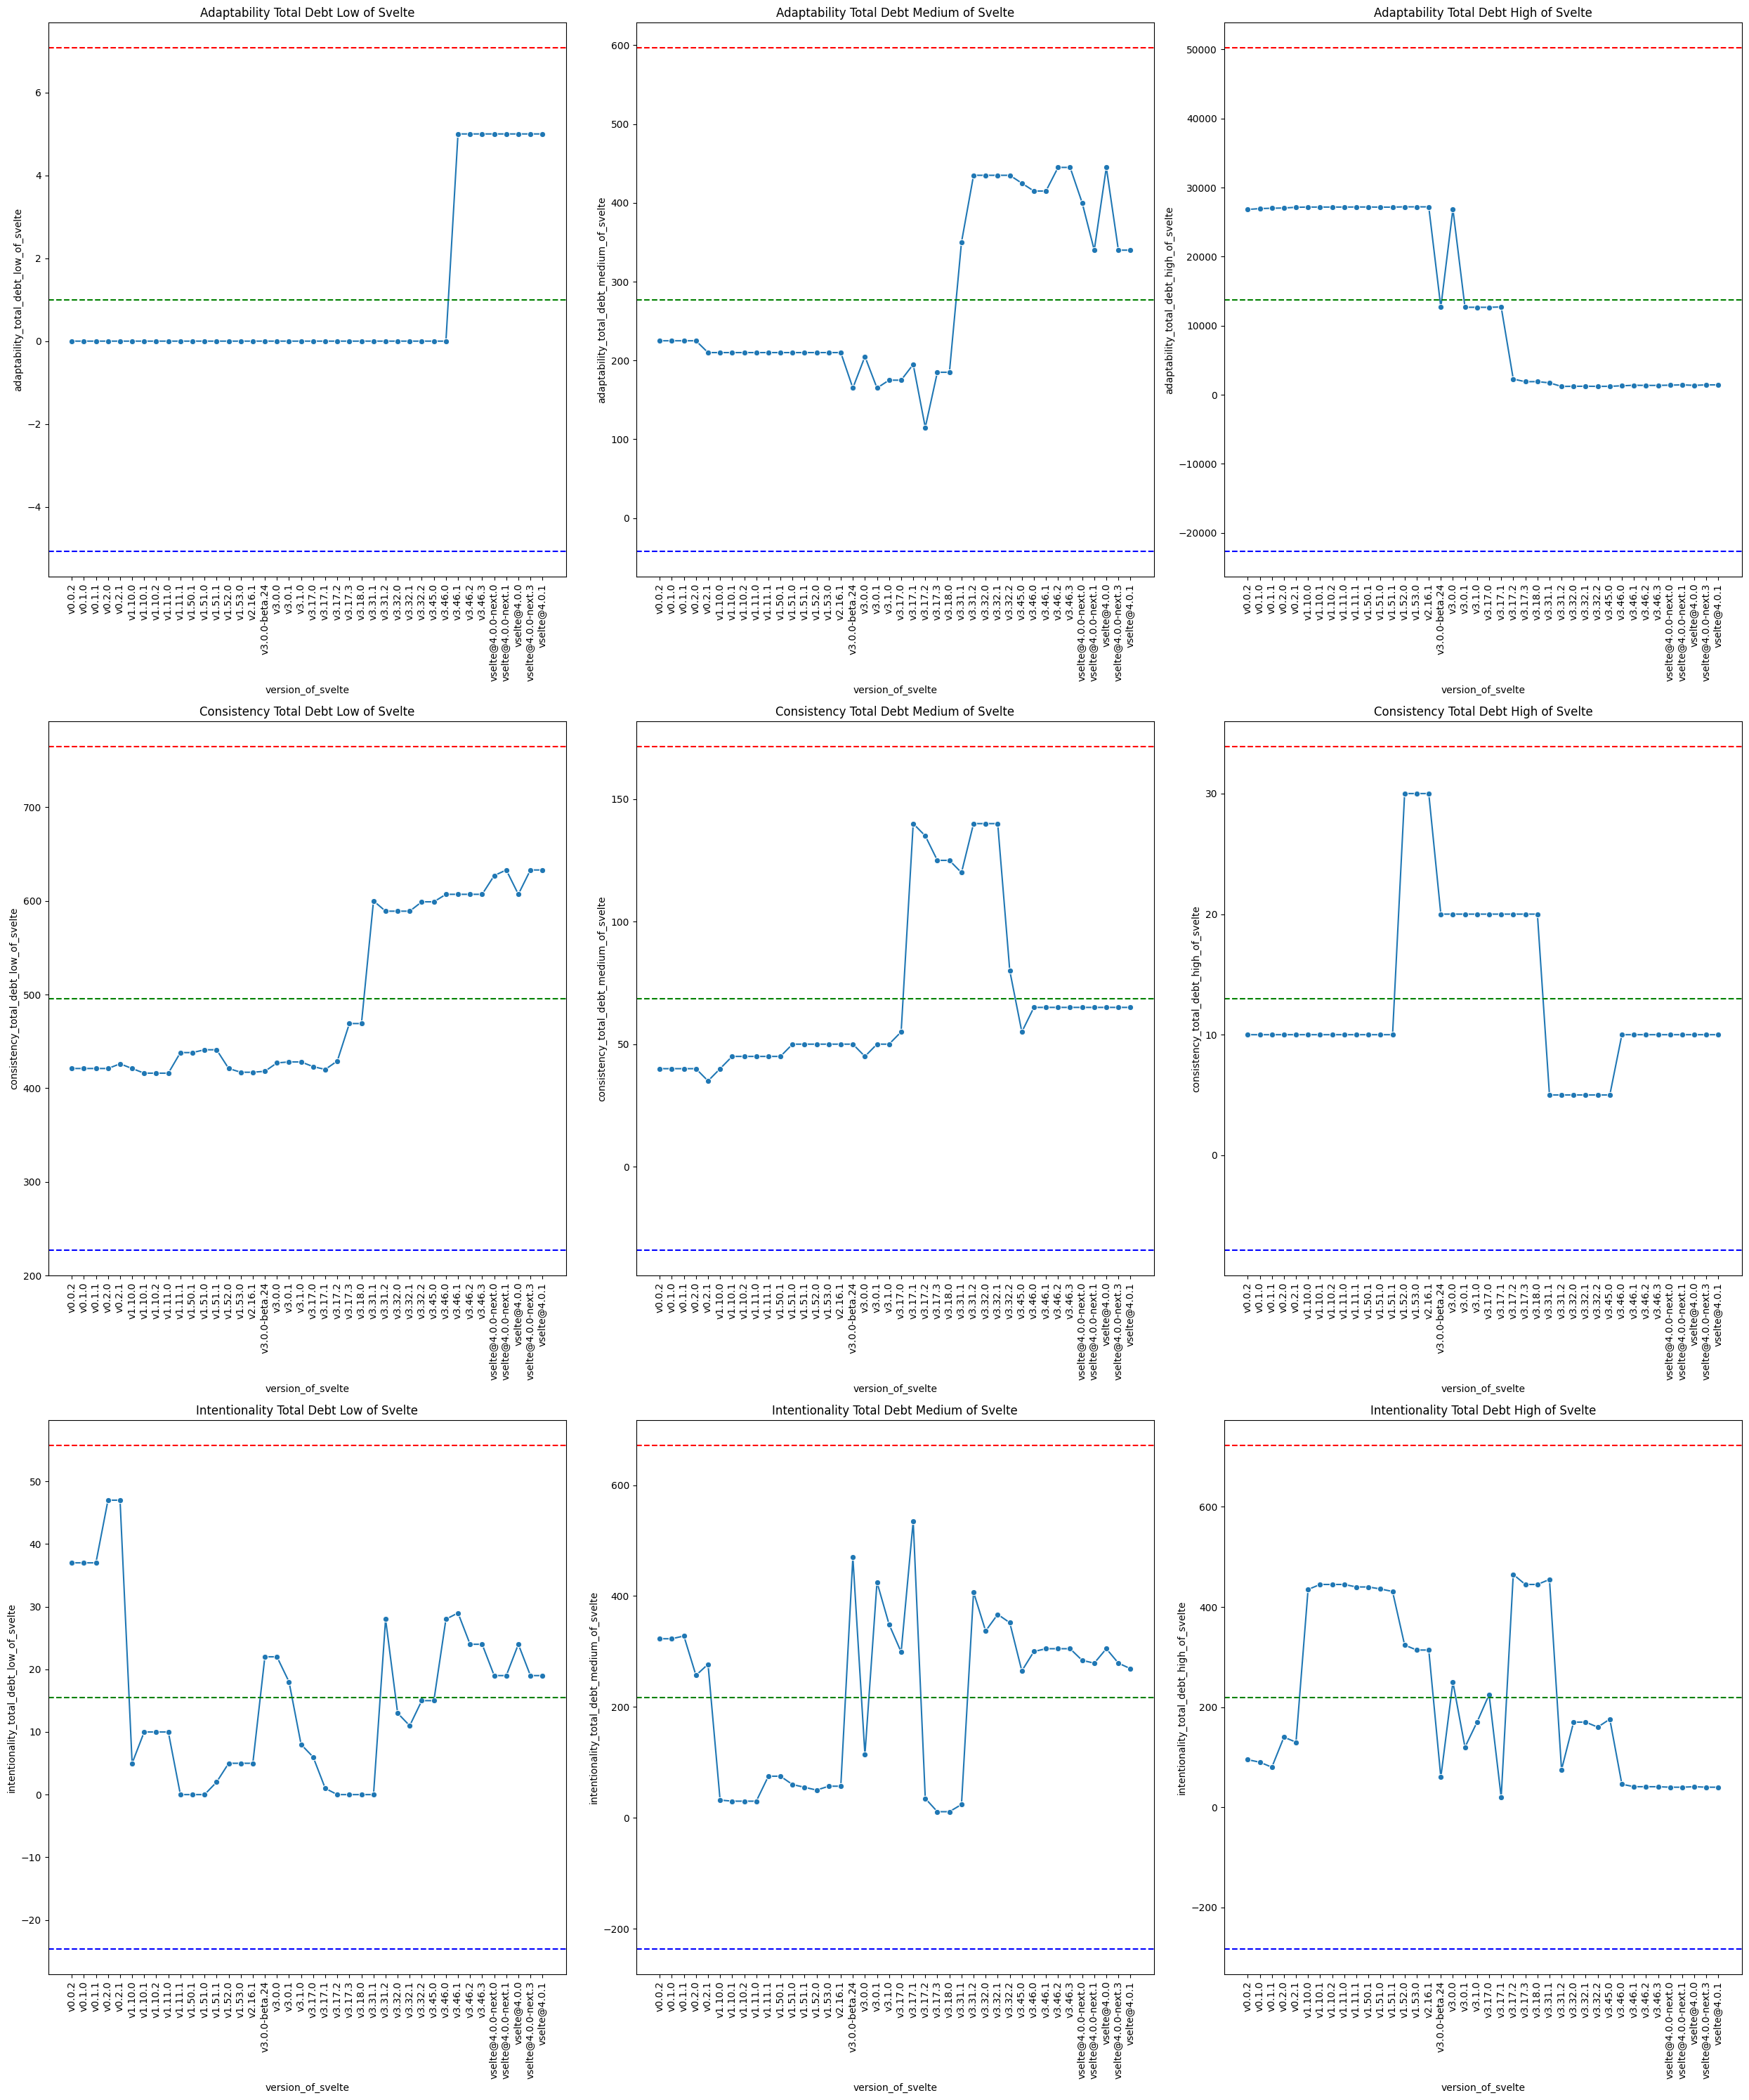

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


def column_to_title(column_name):
    words = column_name.split('_')
    title_words = [word.capitalize() for word in words[:-2]]
    title_words.append('of')
    title_words.append(words[-1].capitalize())
    return ' '.join(title_words)

def plot_control_charts(df, columns, version_col):
    num_plots = len(columns)
    num_rows = 3
    num_cols = 3

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 10*num_rows))

    # Create line plots
    for i, col in enumerate(columns):
        row = i // num_cols
        col_idx = i % num_cols

        # Calculate mean and standard deviation for each column
        mean = df[col].mean()
        std = df[col].std()

        # Calculate LCL and UCL for each column
        lcl = mean - 3*std
        ucl = mean + 3*std

        # Plot the data
        sns.lineplot(x=version_col, y=col, data=df, ax=axs[row, col_idx], marker ='o')
        axs[row, col_idx].axhline(lcl, color='b', linestyle='--')
        axs[row, col_idx].axhline(ucl, color='r', linestyle='--')
        axs[row, col_idx].axhline(mean, color='g', linestyle='--')
        axs[row, col_idx].set_title(column_to_title(col))
        axs[row, col_idx].set_xticklabels(axs[row, col_idx].get_xticklabels(), rotation=90)

    plt.tight_layout()
    plt.show()

# Usage:
plot_control_charts(df, ['adaptability_total_debt_low_of_svelte', 'adaptability_total_debt_medium_of_svelte', 'adaptability_total_debt_high_of_svelte', 'consistency_total_debt_low_of_svelte', 'consistency_total_debt_medium_of_svelte', 'consistency_total_debt_high_of_svelte', 'intentionality_total_debt_low_of_svelte','intentionality_total_debt_medium_of_svelte', 'intentionality_total_debt_high_of_svelte'], 'version_of_svelte')

In [12]:
columns = ['adaptability_total_debt_low_of_svelte', 'adaptability_total_debt_medium_of_svelte', 'adaptability_total_debt_high_of_svelte', 'consistency_total_debt_low_of_svelte', 'consistency_total_debt_medium_of_svelte', 'consistency_total_debt_high_of_svelte', 'intentionality_total_debt_low_of_svelte','intentionality_total_debt_medium_of_svelte', 'intentionality_total_debt_high_of_svelte']

C:\Users\sadik\AppData\Local\Temp\ipykernel_25676\1770133756.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Z-score', y='Column', data=pd.DataFrame(results_list), palette='Set2', ax=axs[i])
C:\Users\sadik\AppData\Local\Temp\ipykernel_25676\1770133756.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Z-score', y='Column', data=pd.DataFrame(results_list), palette='Set2', ax=axs[i])
C:\Users\sadik\AppData\Local\Temp\ipykernel_25676\1770133756.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Z-

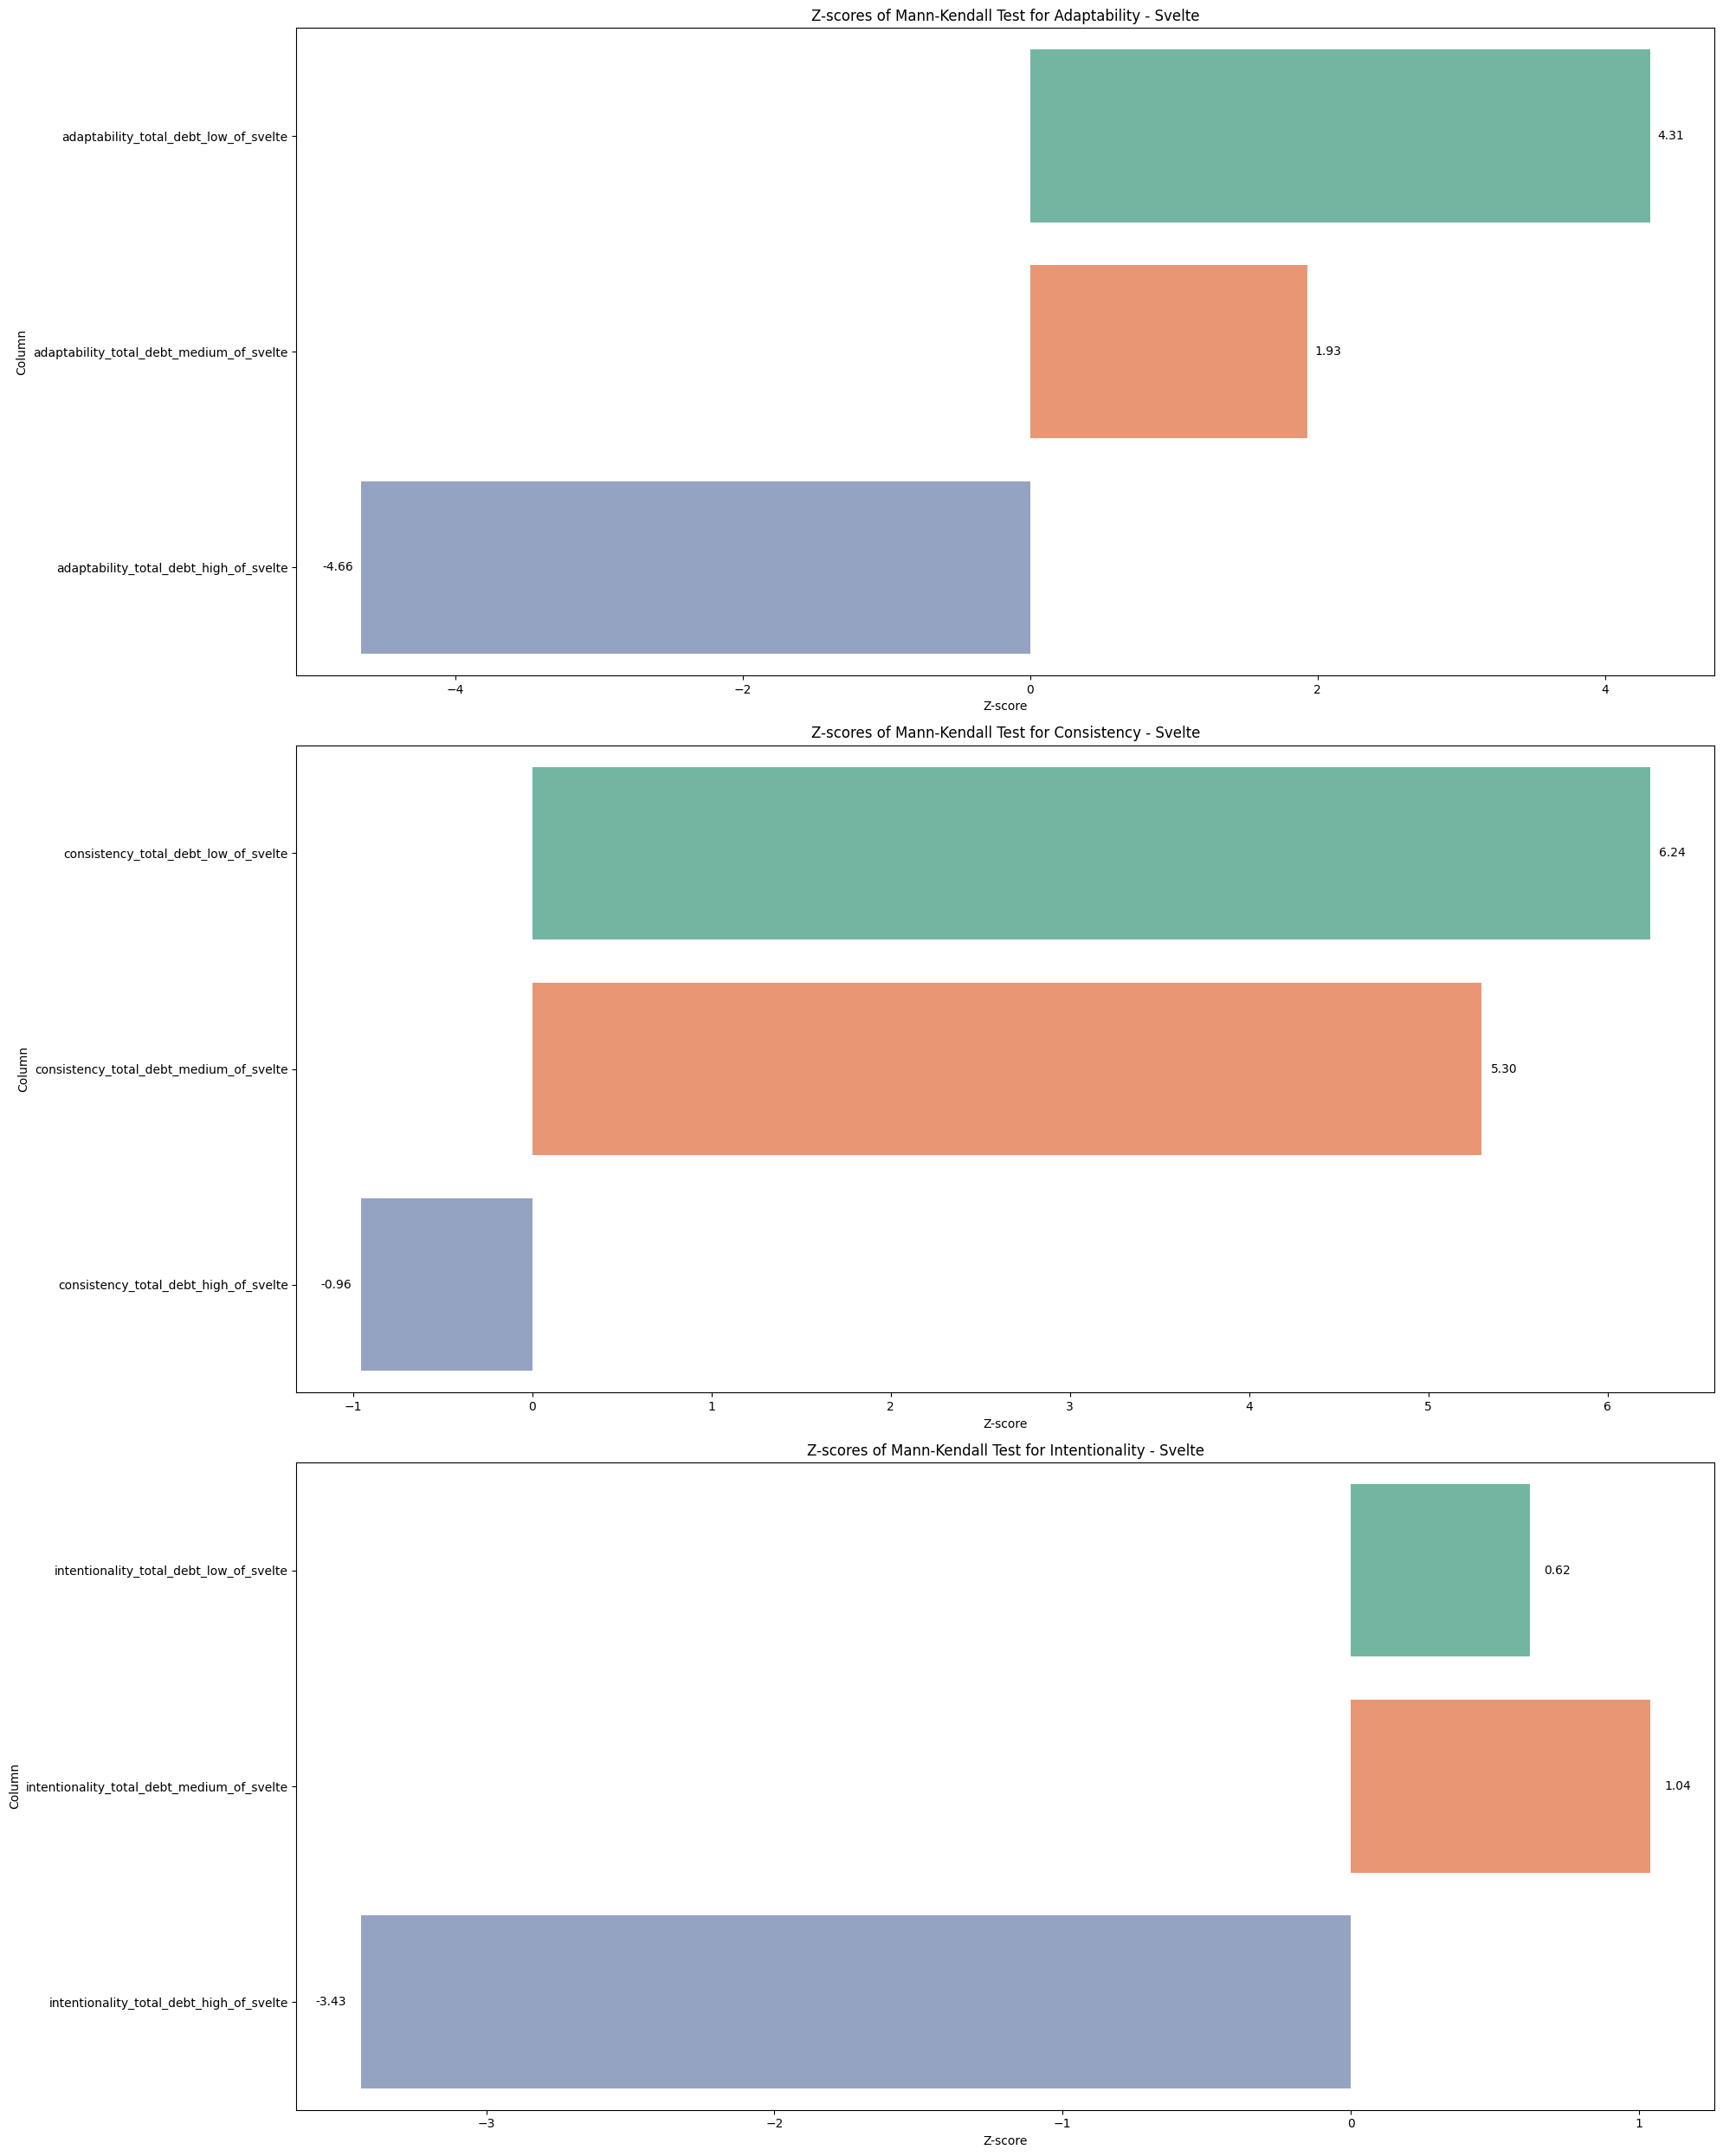

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymannkendall import original_test

# List of libraries
libraries = ['Svelte']

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(20, 25))

# Loop through adaptability, consistency, and intentionality
for i, aspect in enumerate(['Adaptability', 'Consistency', 'Intentionality']):
    # Get the corresponding columns for the aspect
    columns_for_aspect = [col for col in columns if aspect.lower() in col.lower()]

    # Initialize a list to store the results
    results_list = []

    # Loop through individual columns
    for column in columns_for_aspect:
        s = df[column]
        result = original_test(s)

        # Append the results to the list
        results_list.append({
            'Column': column,
            'Trend': result.trend,
            'Hypothesis': result.h,
            'P-value': result.p,
            'Z-score': result.z
        })

    # Plot Z-scores using Seaborn with different colors
    barplot = sns.barplot(x='Z-score', y='Column', data=pd.DataFrame(results_list), palette='Set2', ax=axs[i])

    # Add the values at the top of the bars
    for p in barplot.patches:
        width = p.get_width()
        if width < 0:  # If the Z-score is negative
            ha = 'right'
            x_position = width - 0.05
        else:  # If the Z-score is positive
            ha = 'left'
            x_position = width + 0.05

        axs[i].text(x_position,  
                    p.get_y() + p.get_height() / 2,
                    '{:1.2f}'.format(width),
                    ha=ha,
                    va='center')

    axs[i].set_title(f'Z-scores of Mann-Kendall Test for {aspect} - {libraries[0]}')
    axs[i].set_xlabel('Z-score')
    axs[i].set_ylabel('Column')

# Adjust layout
plt.tight_layout()
plt.show()


In [21]:
for column in columns:
    s = df[column]
    result = original_test(s)
    print(f"Result for {column}:")
    print(f"Trend: {result.trend}")
    print(f"Hypothesis (Trend present): {result.h}")
    print(f"P-value: {result.p}")
    print(f"Z-score: {result.z}")
    print("\n")

Result for adaptability_total_debt_low_of_svelte:
Trend: increasing
Hypothesis (Trend present): True
P-value: 1.6243858180109427e-05
Z-score: 4.3111079407536606


Result for adaptability_total_debt_medium_of_svelte:
Trend: no trend
Hypothesis (Trend present): False
P-value: 0.05348154715509934
Z-score: 1.9310121721475593


Result for adaptability_total_debt_high_of_svelte:
Trend: decreasing
Hypothesis (Trend present): True
P-value: 3.238451812714871e-06
Z-score: -4.655086206098325


Result for consistency_total_debt_low_of_svelte:
Trend: increasing
Hypothesis (Trend present): True
P-value: 4.480411597285183e-10
Z-score: 6.23630012608212


Result for consistency_total_debt_medium_of_svelte:
Trend: increasing
Hypothesis (Trend present): True
P-value: 1.1784894815569658e-07
Z-score: 5.29680108801474


Result for consistency_total_debt_high_of_svelte:
Trend: no trend
Hypothesis (Trend present): False
P-value: 0.33880337092054913
Z-score: -0.9565323056730268


Result for intentionality_tota